In [1]:
#import the libraries
import re
import nltk 
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline
                      

In [3]:
#read the csv file dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
#view the label 0 data
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [5]:
#view the label 1 data
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [6]:
#view the test dataset
print(test.columns)

Index(['id', 'tweet'], dtype='object')


In [7]:
test.columns = test.columns.str.strip()
print(test.head(10))


      id  \
0  31963   
1  31964   
2  31965   
3  31966   
4  31967   
5  31968   
6  31969   
7  31970   
8  31971   
9  31972   

                                                                                                                                            tweet  
0                                                      #studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ¦   
1                                            @user #white #supremacists want everyone to see the new â  #birdsâ #movie â and hereâs why    
2                                                                         safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!!   
3  is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð   #harrypotter #pottermore #favorite  
4                                                     3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves 

In [8]:
train.shape

(31962, 3)

In [9]:
test.shape

(17197, 2)

In [10]:
train['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In [11]:
test['tweet'].value_counts()

tweet
#model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦                           170
i finally found a way how to delete old tweets! you might find it useful as well:    #deletetweets              43
aww yeah it's all good bing bong bing bong                                                                      32
i'm so   and #grateful now that - #affirmations                                                                 31
@user #feminismiscancer #feminismisterrorism #feminismmuktbharat why  #malevote is ignored  @user               20
                                                                                                              ... 
found this picture of #dutchdame with the one and only @user &amp; @user at @user                                1
after a long struggle.. today i can say i am  ...!!!!                                                            1
ðð pressed over a whole other girl ð­                             

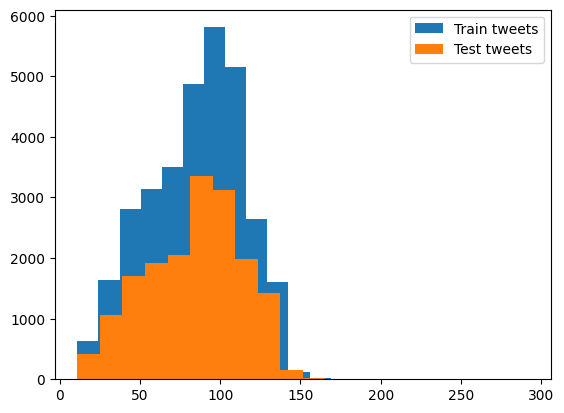

In [12]:
length_train_dataset=train['tweet'].str.len()
length_test_dataset=test['tweet'].str.len()
plt.hist(length_train_dataset,bins=20,label="Train tweets")
plt.hist(length_test_dataset,bins=20,label="Test tweets")
plt.legend()
plt.show()

In [13]:
import pandas as pd
combine=pd.concat([train,test],ignore_index=True)
print(combine.shape)

(49159, 3)


In [14]:
def remove_pattern(input_text,pattern):
    r=re.findall(pattern,input_text)
    for i in r:
        input_text=r.sub(i, '', input_text)
        return input_text

In [16]:
import numpy as np
import re

# Define the remove_pattern function
def remove_pattern(text, pattern):
    return re.sub(pattern, '', text)

# Use raw string notation for the regular expression
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['tweet'], r"@[\w]*")

# Display the first few rows
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]"," ",regex=True)
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [18]:
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #removing words whose length is less than 3

In [19]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [20]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [21]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #it will stemmatized all words in tweet

In [22]:
#now let's combine these tokens back

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
combine['tidy_tweet'] = tokenized_tweet

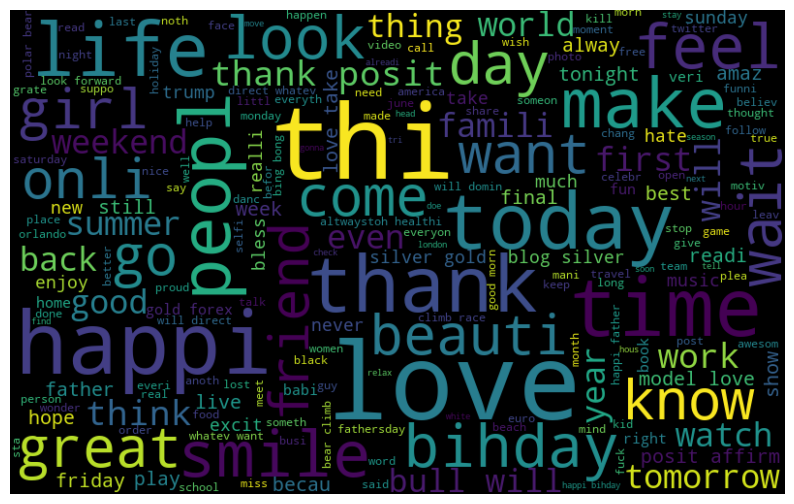

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all tweets into a single string
all_words = ' '.join(text for text in combine['tidy_tweet'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()



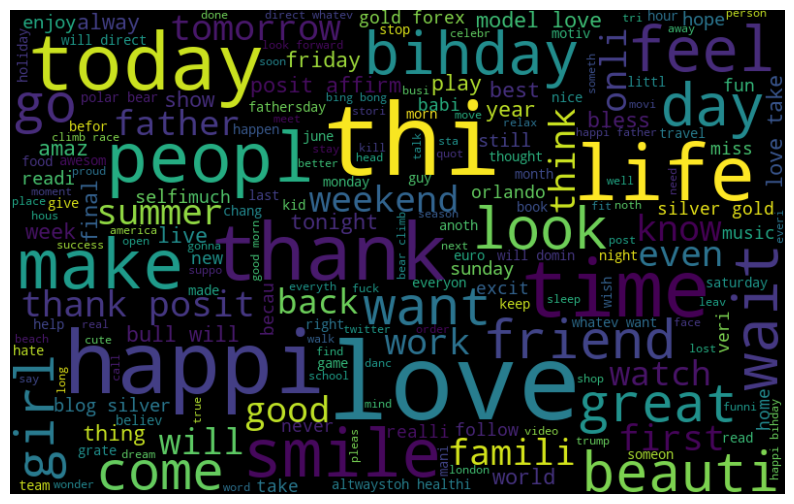

In [24]:
normal_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

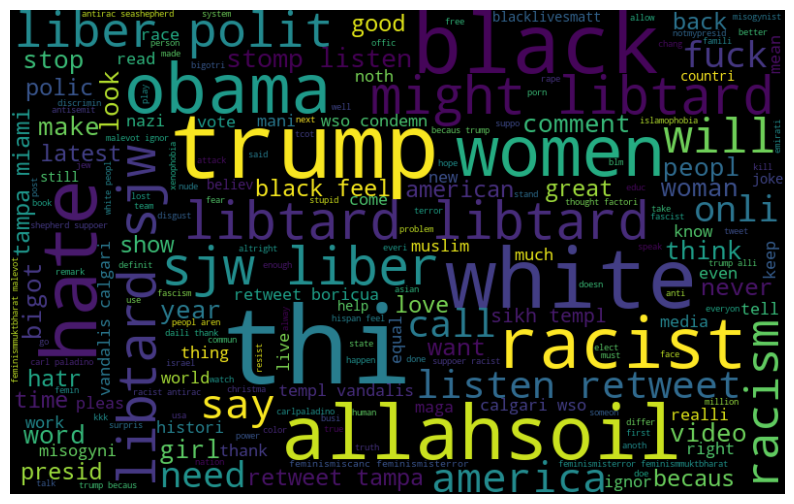

In [25]:
negative_words= ' '.join([text for text in combine['tidy_tweet'][combine['label']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
#collect hashtags

def hashtag_extract(x):
    hashtags=[]
    for i in x: #loop over words contain in tweet
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [27]:
#extracting hashtags from non racist tweets
ht_regular = hashtag_extract(combine['tidy_tweet'][combine['label']==0])
#extracting hashtags from racist tweets
ht_negative=hashtag_extract(combine['tidy_tweet'][combine['label']==1])
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])


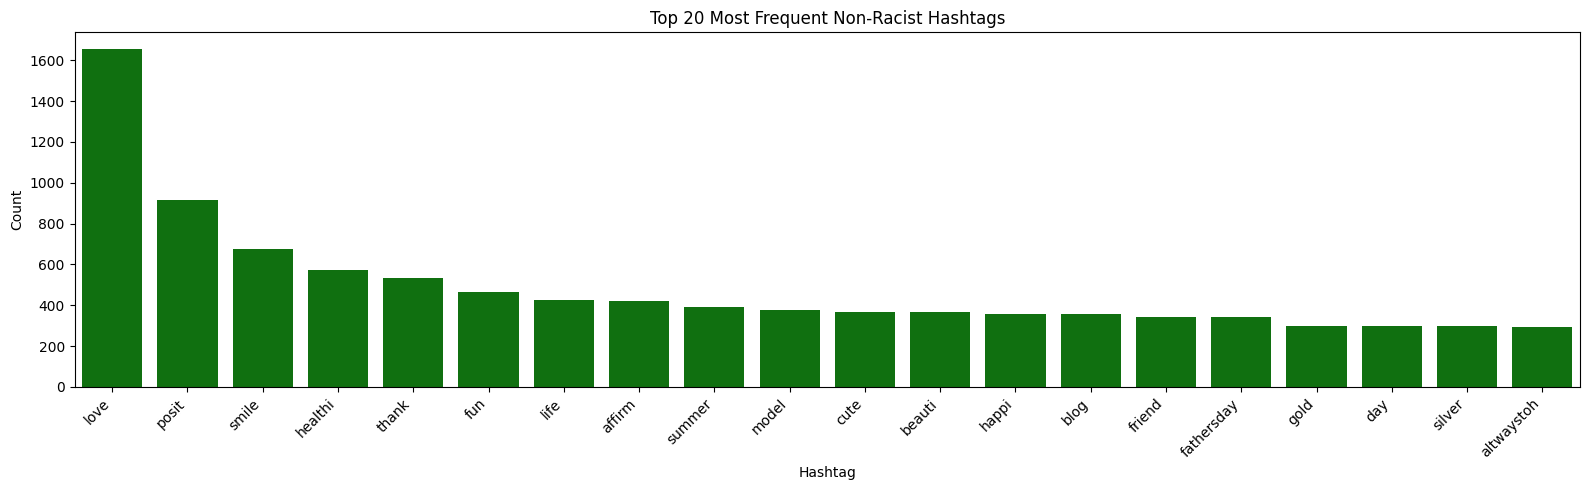

In [28]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ht_regular is a list of hashtags from non-racist tweets
nonracist_tweets = nltk.FreqDist(ht_regular)
df1 = pd.DataFrame({'Hashtag': list(nonracist_tweets.keys()), 'Count': list(nonracist_tweets.values())})

# Selecting top 20 most frequent hashtags
df1 = df1.nlargest(20, 'Count')

# Plotting
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=df1, x='Hashtag', y='Count', color='green')  # Use color directly instead of palette

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Label settings
ax.set_ylabel('Count')
plt.title('Top 20 Most Frequent Non-Racist Hashtags')
plt.xlabel('Hashtag')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()




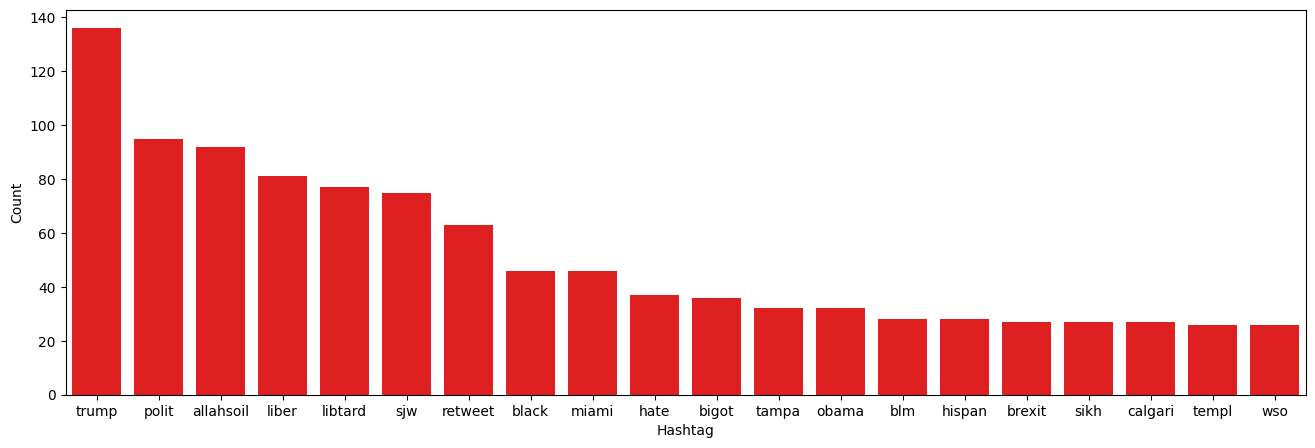

In [29]:
racist_tweets = nltk.FreqDist(ht_negative)
df2 = pd.DataFrame({'Hashtag': list(racist_tweets.keys()),'Count': list(racist_tweets.values())}) #count number of occurrence of particular word

#selecting top 20 frequent  hashtags

df2 = df2.nlargest(columns = "Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df2, x="Hashtag",y="Count",color='red' )
plt.show()


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

# Example usage
documents = ["This is a sample document.", "This document is a sample."]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

print("Feature names:", vectorizer.get_feature_names_out())
print("Document-term matrix:\n", X.toarray())



Feature names: ['document' 'is' 'sample' 'this']
Document-term matrix:
 [[1 1 1 1]
 [1 1 1 1]]


In [31]:
#Bag-of-words

#Each row in matrix M contains the frequency of tokens(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweet']) # tokenize and build vocabulary
bow.shape

(49159, 1000)

In [32]:
#Tf-Idf
combine=combine.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine['label'],
                                                    test_size=0.2, random_state=69)

In [33]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (39327, 1000)
X_test_shape :  (9832, 1000)
y_train_shape :  (39327,)
y_test_shape :  (9832,)


In [34]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)


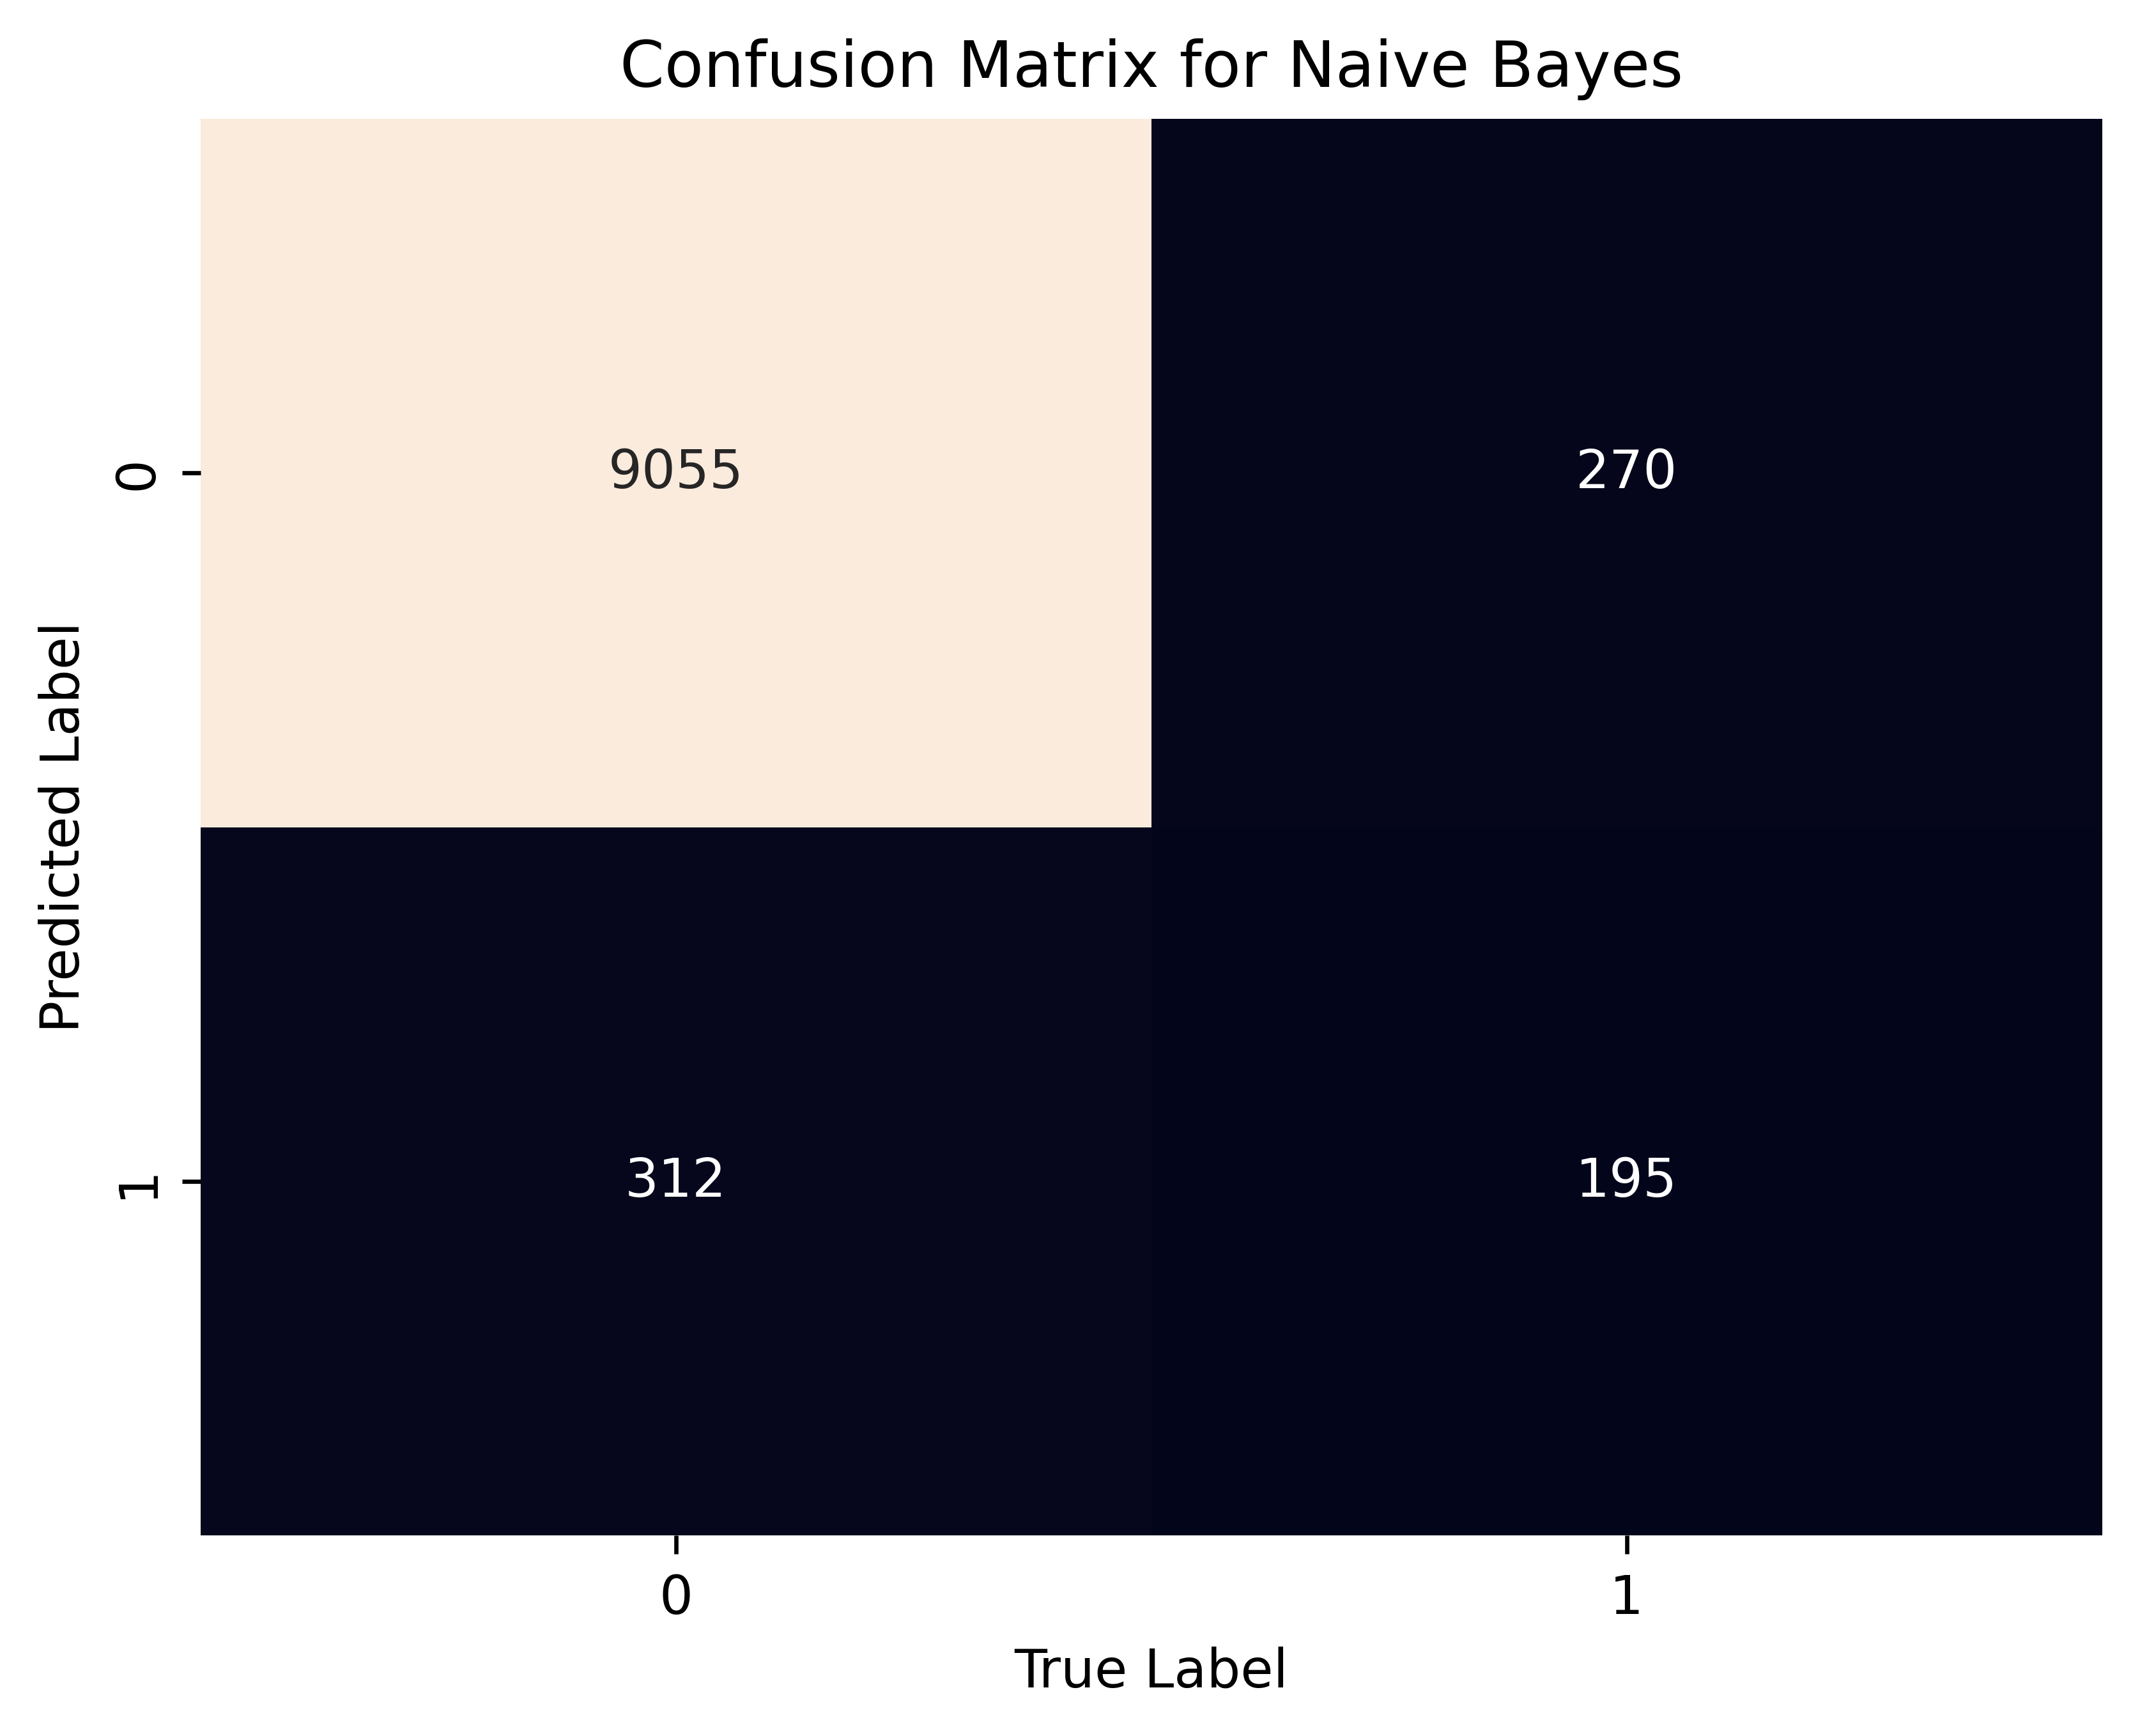

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
Execution Time: 2.6019 seconds


In [35]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score  # Import recall_score

# Start the timer
start_time = time.time()

# Generate the confusion matrix
mat = confusion_matrix(y_test, predicted_naive)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_naive)
precision = precision_score(y_test, predicted_naive, average='weighted')  # Change average as needed
recall = recall_score(y_test, predicted_naive, average='weighted')  # Calculate recall
f1 = f1_score(y_test, predicted_naive, average='weighted')  # Change average as needed

# Create a heatmap for the confusion matrix
plt.figure(dpi=600)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

# Add title and labels
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# Save and show the plot
plt.savefig("confusion_matrix.png")
plt.show()

# Calculate execution time
end_time = time.time()
execution_time = end_time - start_time

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")  # Print recall
print(f"F1 Score: {f1:.2f}")
print(f"Execution Time: {execution_time:.4f} seconds")


In [36]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.9408055329536208


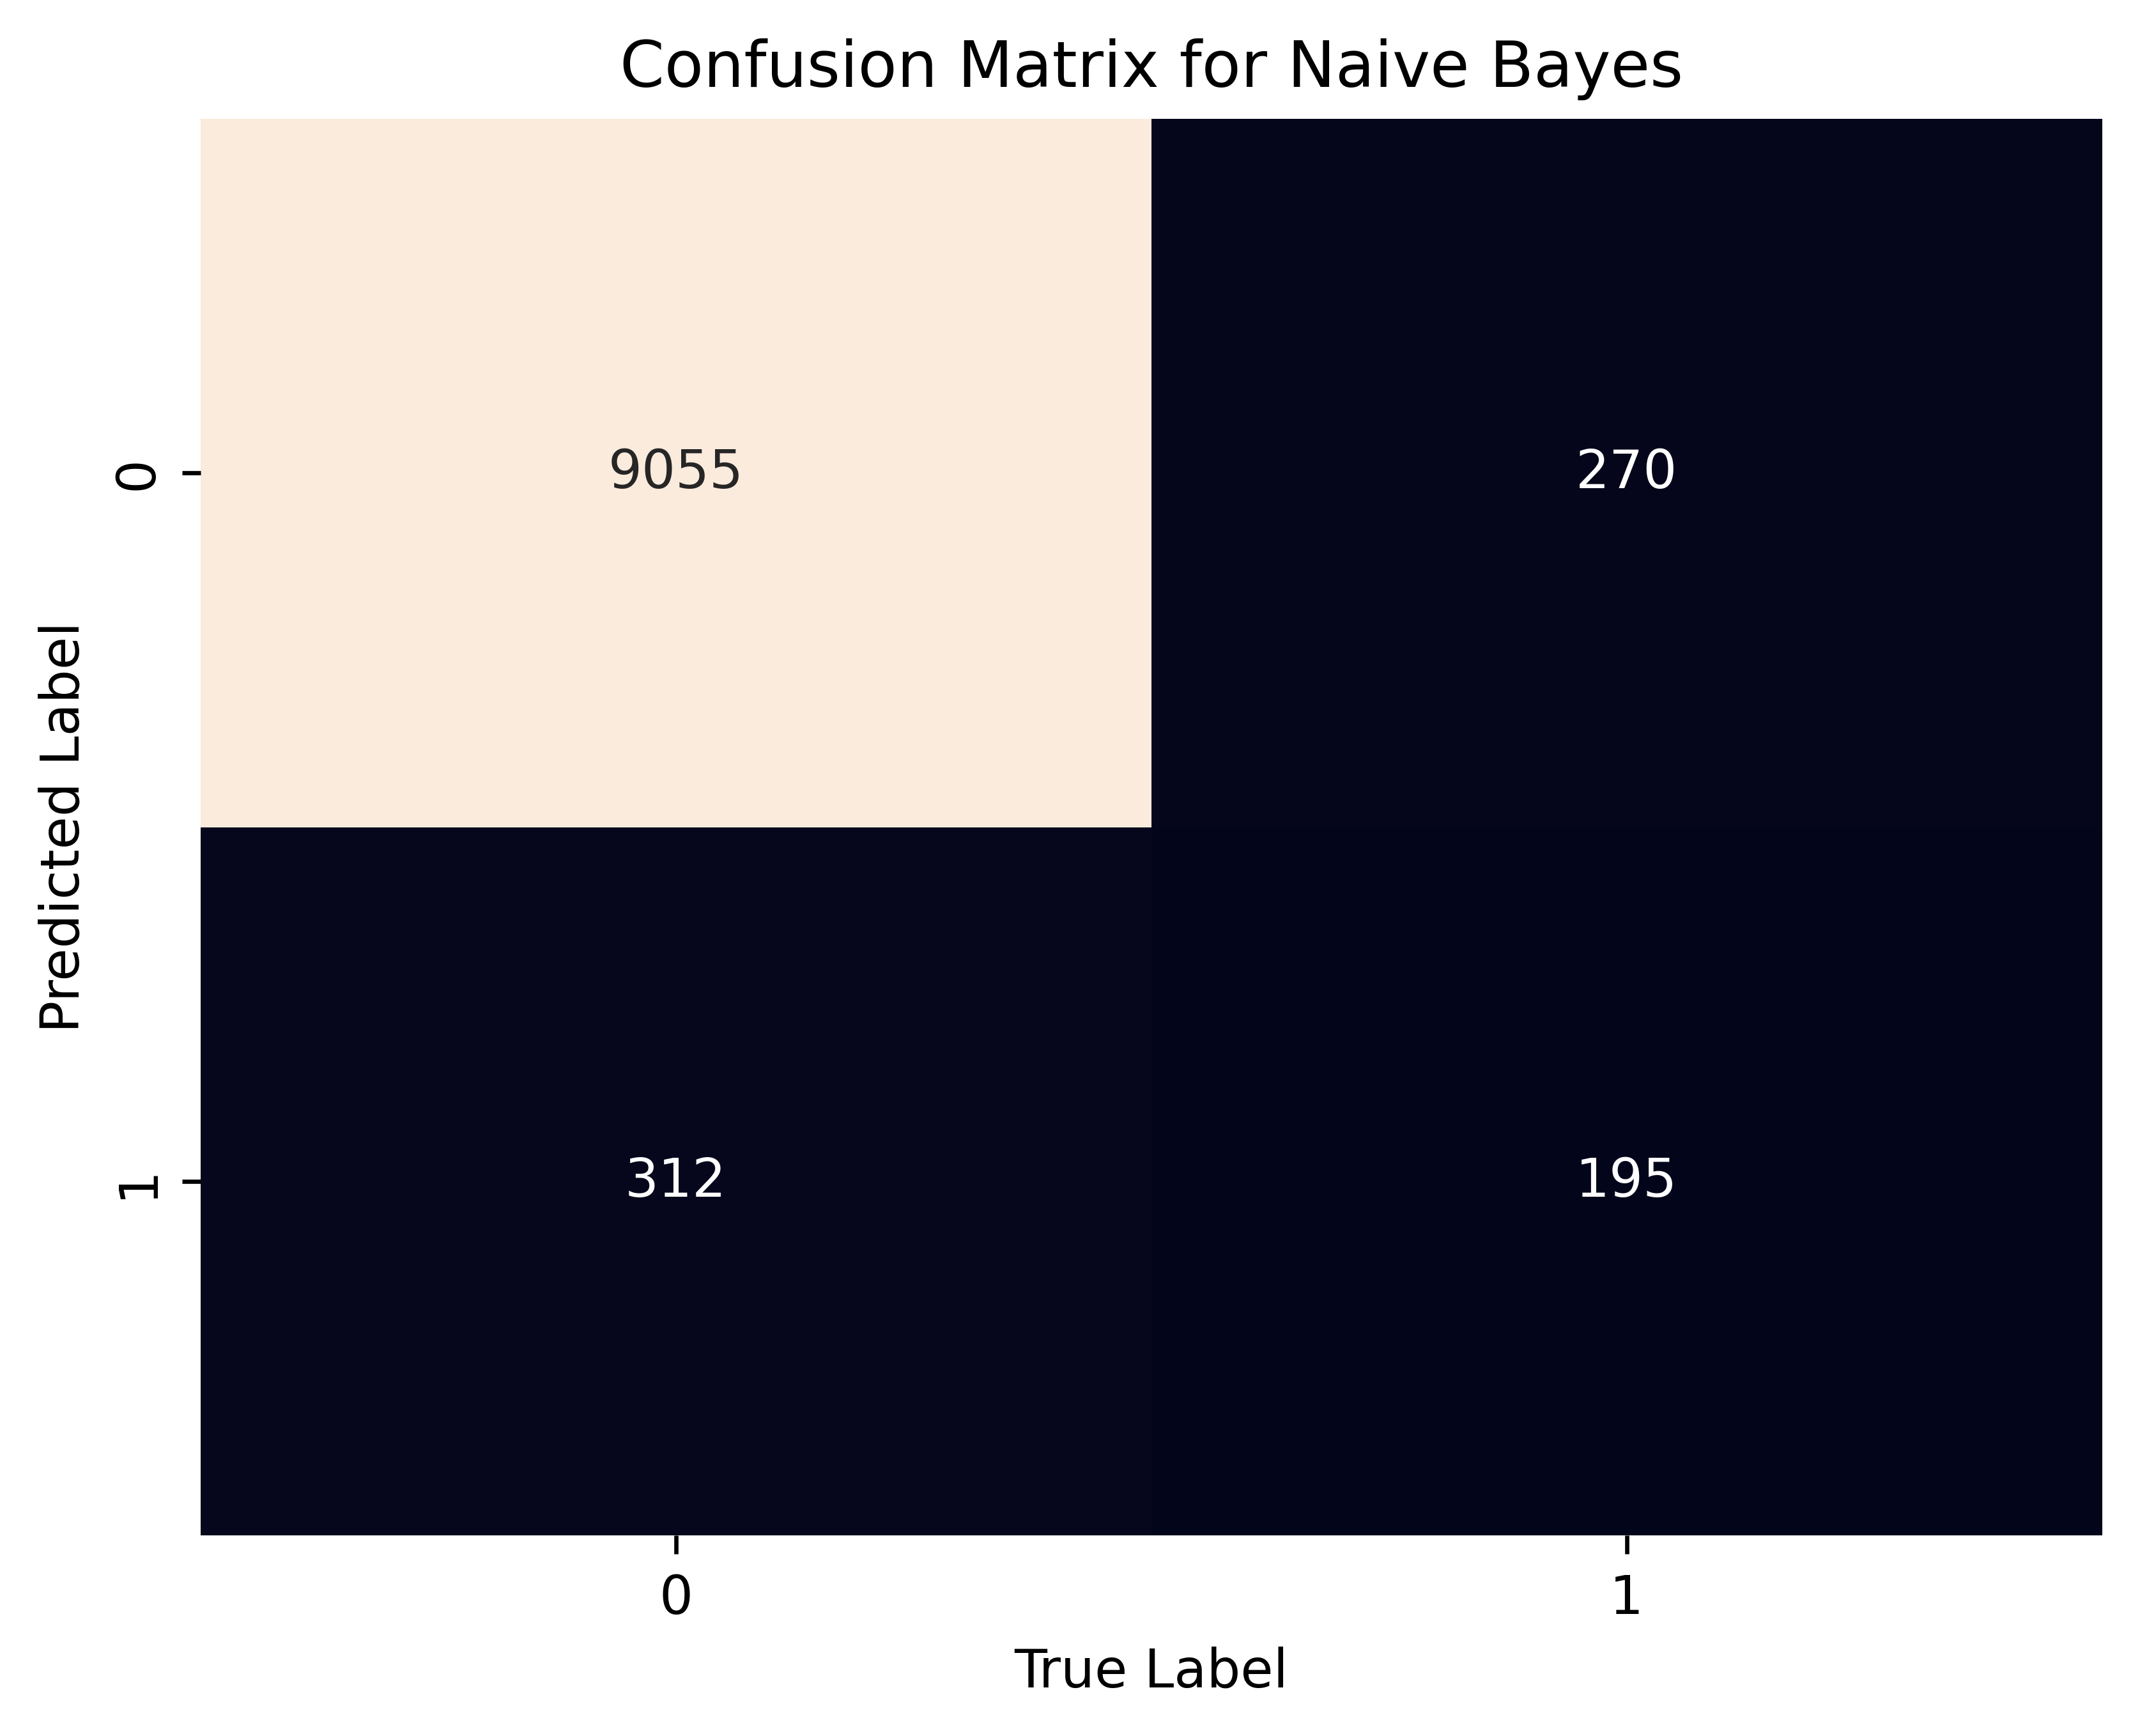

Accuracy: 0.94
Precision: 0.94
F1 Score: 0.94
Execution Time: 2.2751 seconds


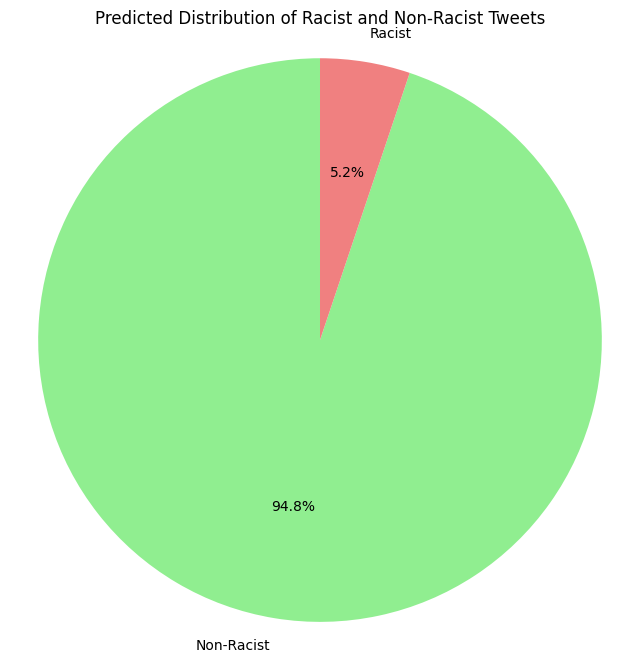

In [37]:
# A. Import necessary libraries
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

# B. Start the timer to measure execution time
start_time = time.time()

# C. Generate the confusion matrix
mat = confusion_matrix(y_test, predicted_naive)

# D. Calculate performance metrics
accuracy = accuracy_score(y_test, predicted_naive)
precision = precision_score(y_test, predicted_naive, average='weighted')  # Change average as needed
f1 = f1_score(y_test, predicted_naive, average='weighted')  # Change average as needed

# E. Create a heatmap for the confusion matrix
plt.figure(dpi=600)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

# F. Add title and labels to the heatmap
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# G. Save and show the confusion matrix plot
plt.savefig("confusion_matrix.png")
plt.show()

# H. Calculate execution time
end_time = time.time()
execution_time = end_time - start_time

# I. Display performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Execution Time: {execution_time:.4f} seconds")

# J. Pie chart for predicted labels
predicted_counts = pd.Series(predicted_naive).value_counts()

# K. Define labels for the pie chart
labels = ['Non-Racist', 'Racist']  # Assuming 0 = Non-Racist, 1 = Racist

# L. Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(predicted_counts, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('Predicted Distribution of Racist and Non-Racist Tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [38]:
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier

# Initialize the Random Forest model
model_random_forest = RandomForestClassifier()

# Train the model
model_random_forest.fit(X_train, y_train)

# Make predictions
predicted_random_forest = model_random_forest.predict(X_test)


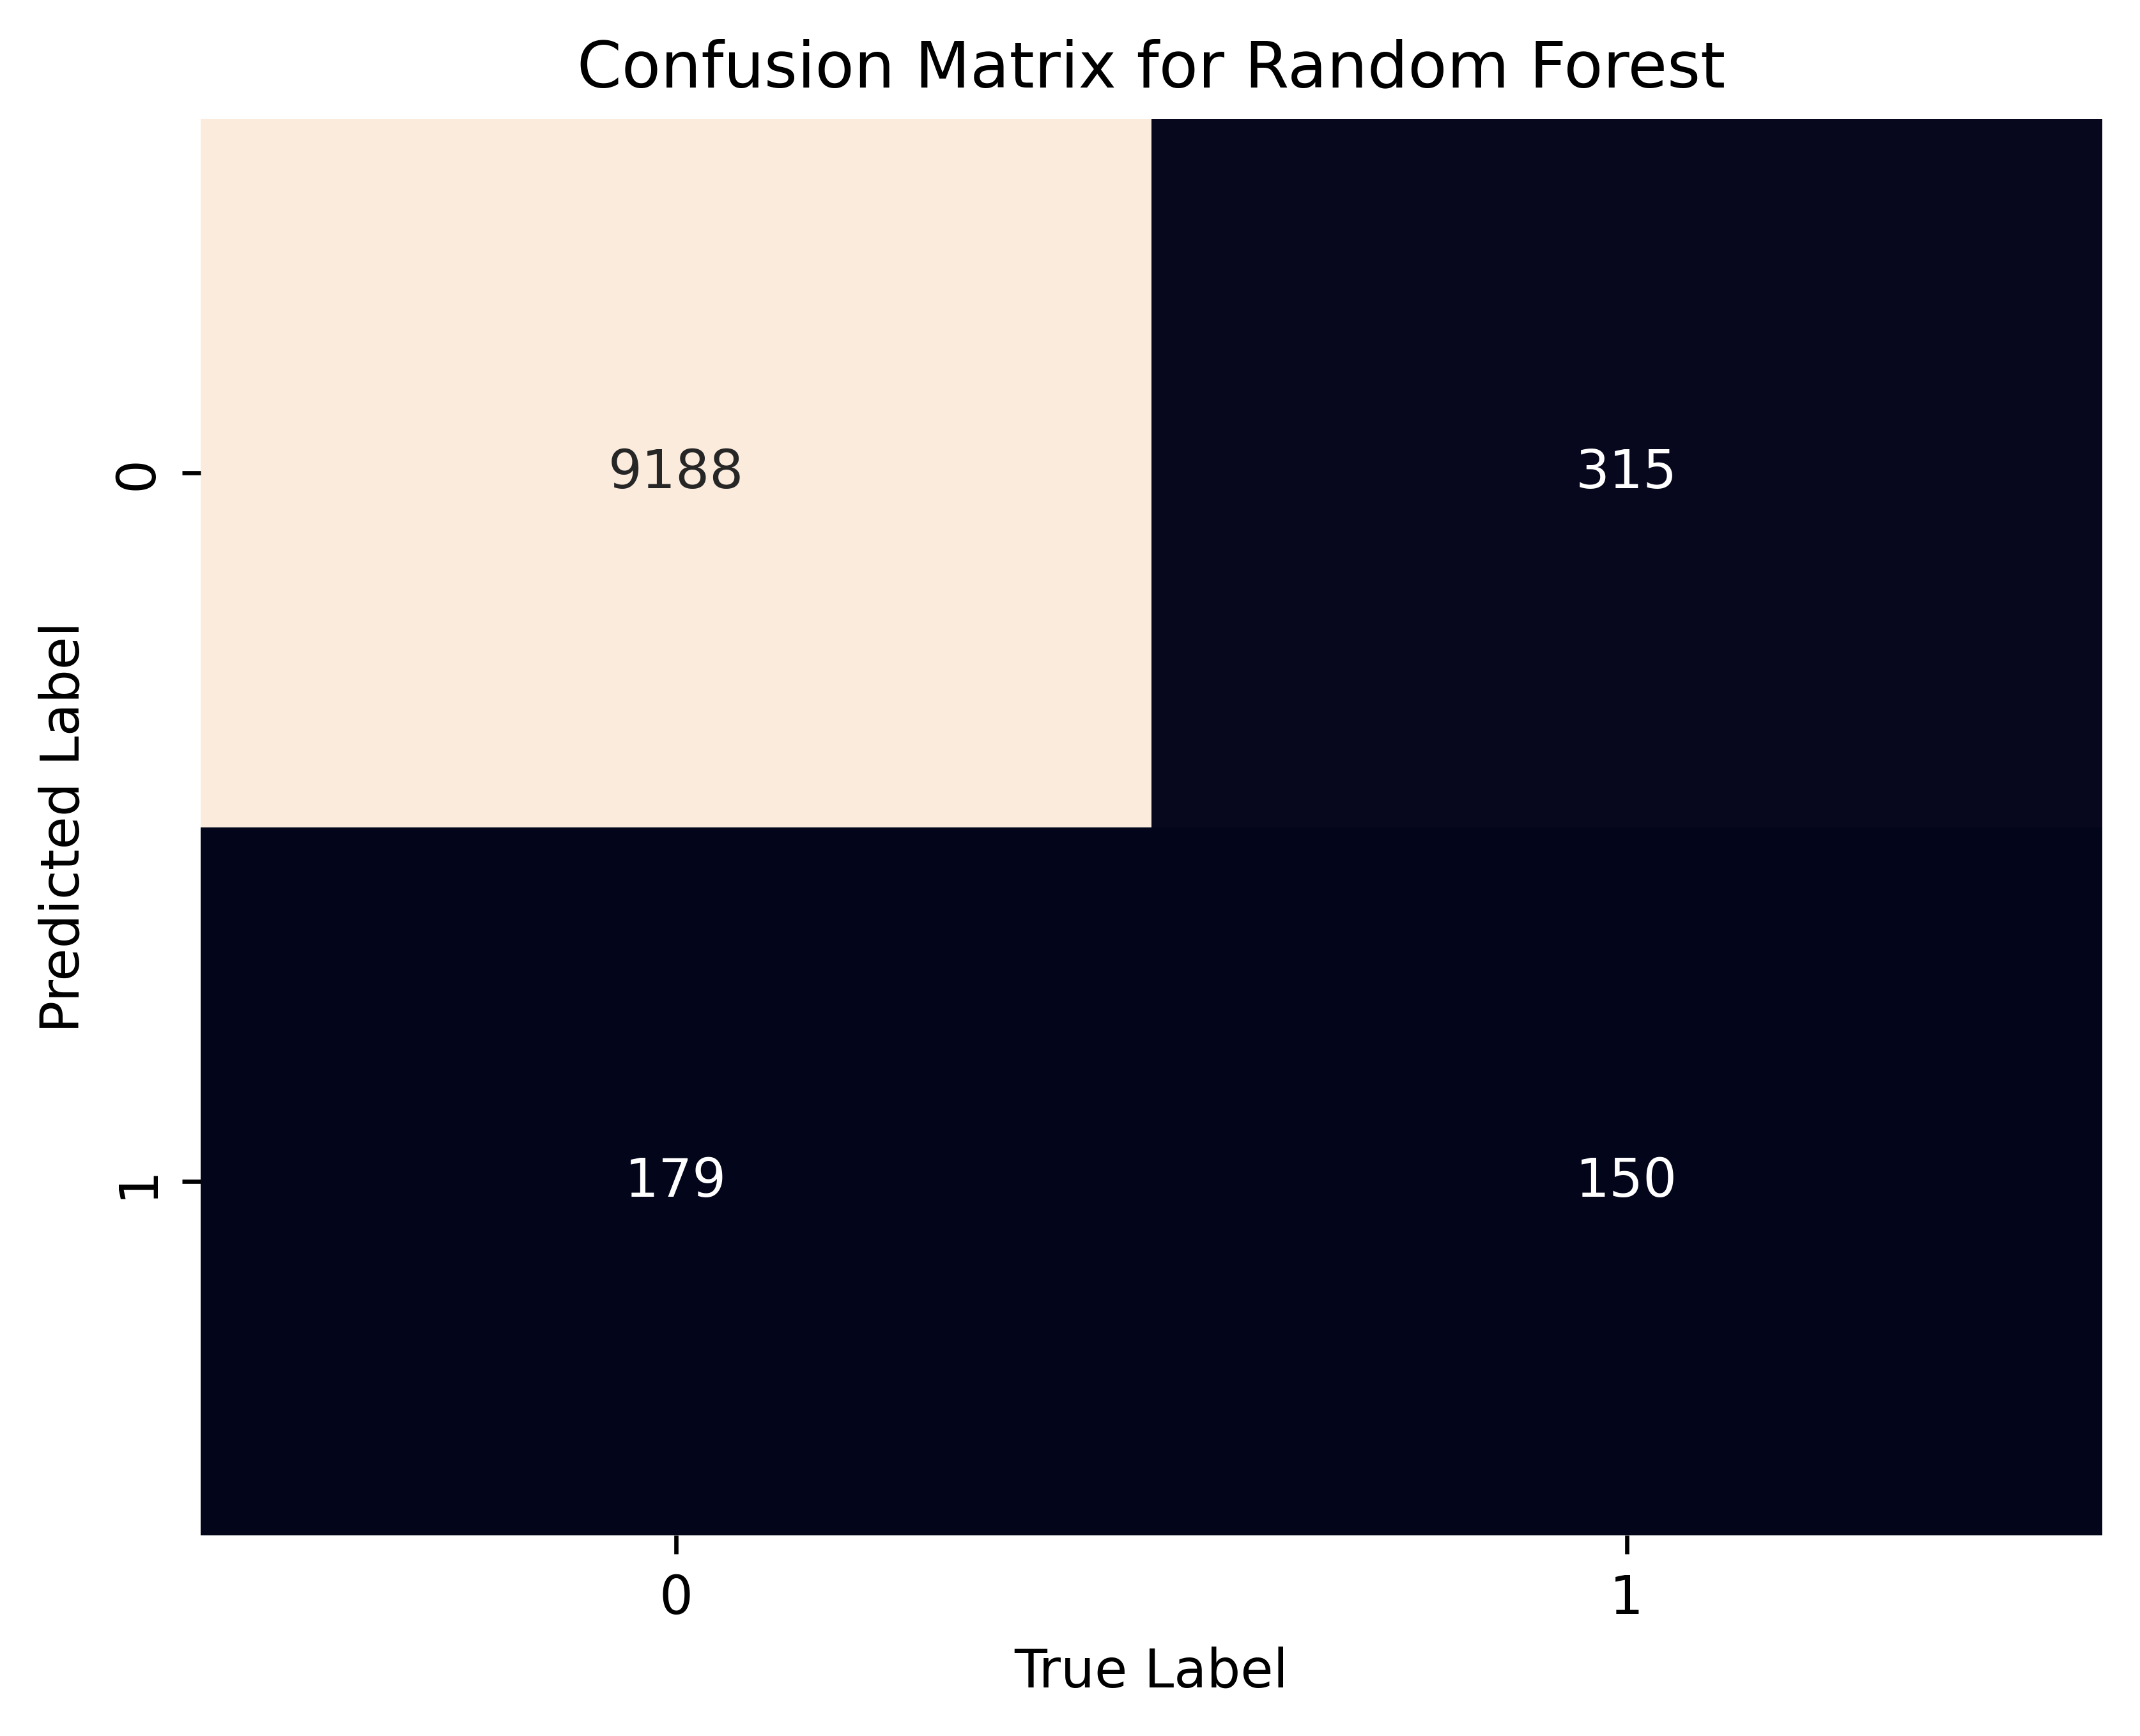

Accuracy: 0.95
Precision: 0.94
Recall: 0.95
F1 Score: 0.95
Execution Time: 62.4646 seconds


In [39]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score  # Import necessary metrics

# Start the timer
start_time = time.time()

# A. Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed
rf_classifier.fit(X_train, y_train)  # Train with your features (X_train) and labels (y_train)

# B. Predict labels for the test set
predicted_rf = rf_classifier.predict(X_test)

# Generate the confusion matrix
mat = confusion_matrix(y_test, predicted_rf)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_rf)
precision = precision_score(y_test, predicted_rf, average='weighted')  # Change average as needed
recall = recall_score(y_test, predicted_rf, average='weighted')  # Calculate recall
f1 = f1_score(y_test, predicted_rf, average='weighted')  # Change average as needed

# Create a heatmap for the confusion matrix
plt.figure(dpi=600)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

# Add title and labels
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# Save and show the plot
plt.savefig("confusion_matrix_rf.png")
plt.show()

# Calculate execution time
end_time = time.time()
execution_time = end_time - start_time

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")  # Print recall
print(f"F1 Score: {f1:.2f}")
print(f"Execution Time: {execution_time:.4f} seconds")


In [40]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Random Forest predictions
score_random_forest = accuracy_score(predicted_random_forest, y_test)
print("Accuracy with Random Forest: ", score_random_forest)


Accuracy with Random Forest:  0.9505695687550855


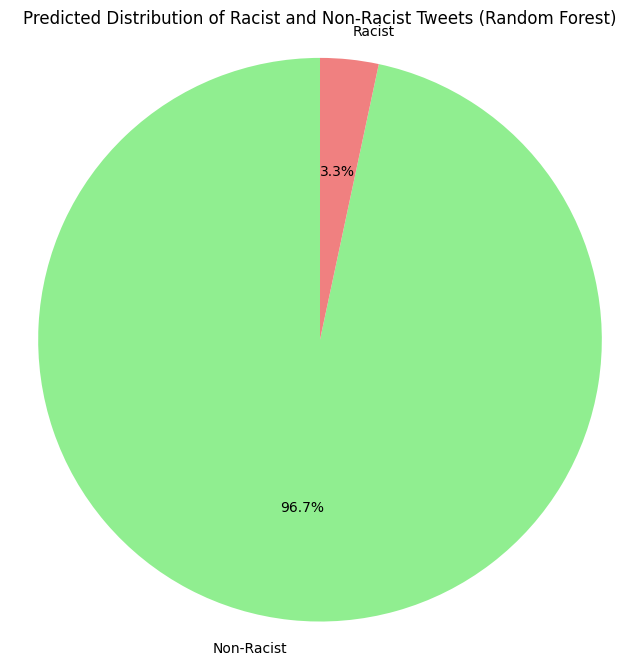

In [41]:
# A. Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

# B. Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed
rf_classifier.fit(X_train, y_train)  # Train with your features and labels

# C. Predict labels for the test set
predicted_rf = rf_classifier.predict(X_test)

# D. Pie chart for predicted labels
predicted_counts = pd.Series(predicted_rf).value_counts()

# E. Define labels for the pie chart
labels = ['Non-Racist', 'Racist']  # Assuming 0 = Non-Racist, 1 = Racist

# F. Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(predicted_counts, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('Predicted Distribution of Racist and Non-Racist Tweets (Random Forest)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [42]:

from sklearn.svm import SVC  # Support Vector Machine Classifier

# Initialize and train the SVM model
model_svm = SVC().fit(X_train, y_train)

# Make predictions on the test set
predicted_svm = model_svm.predict(X_test)

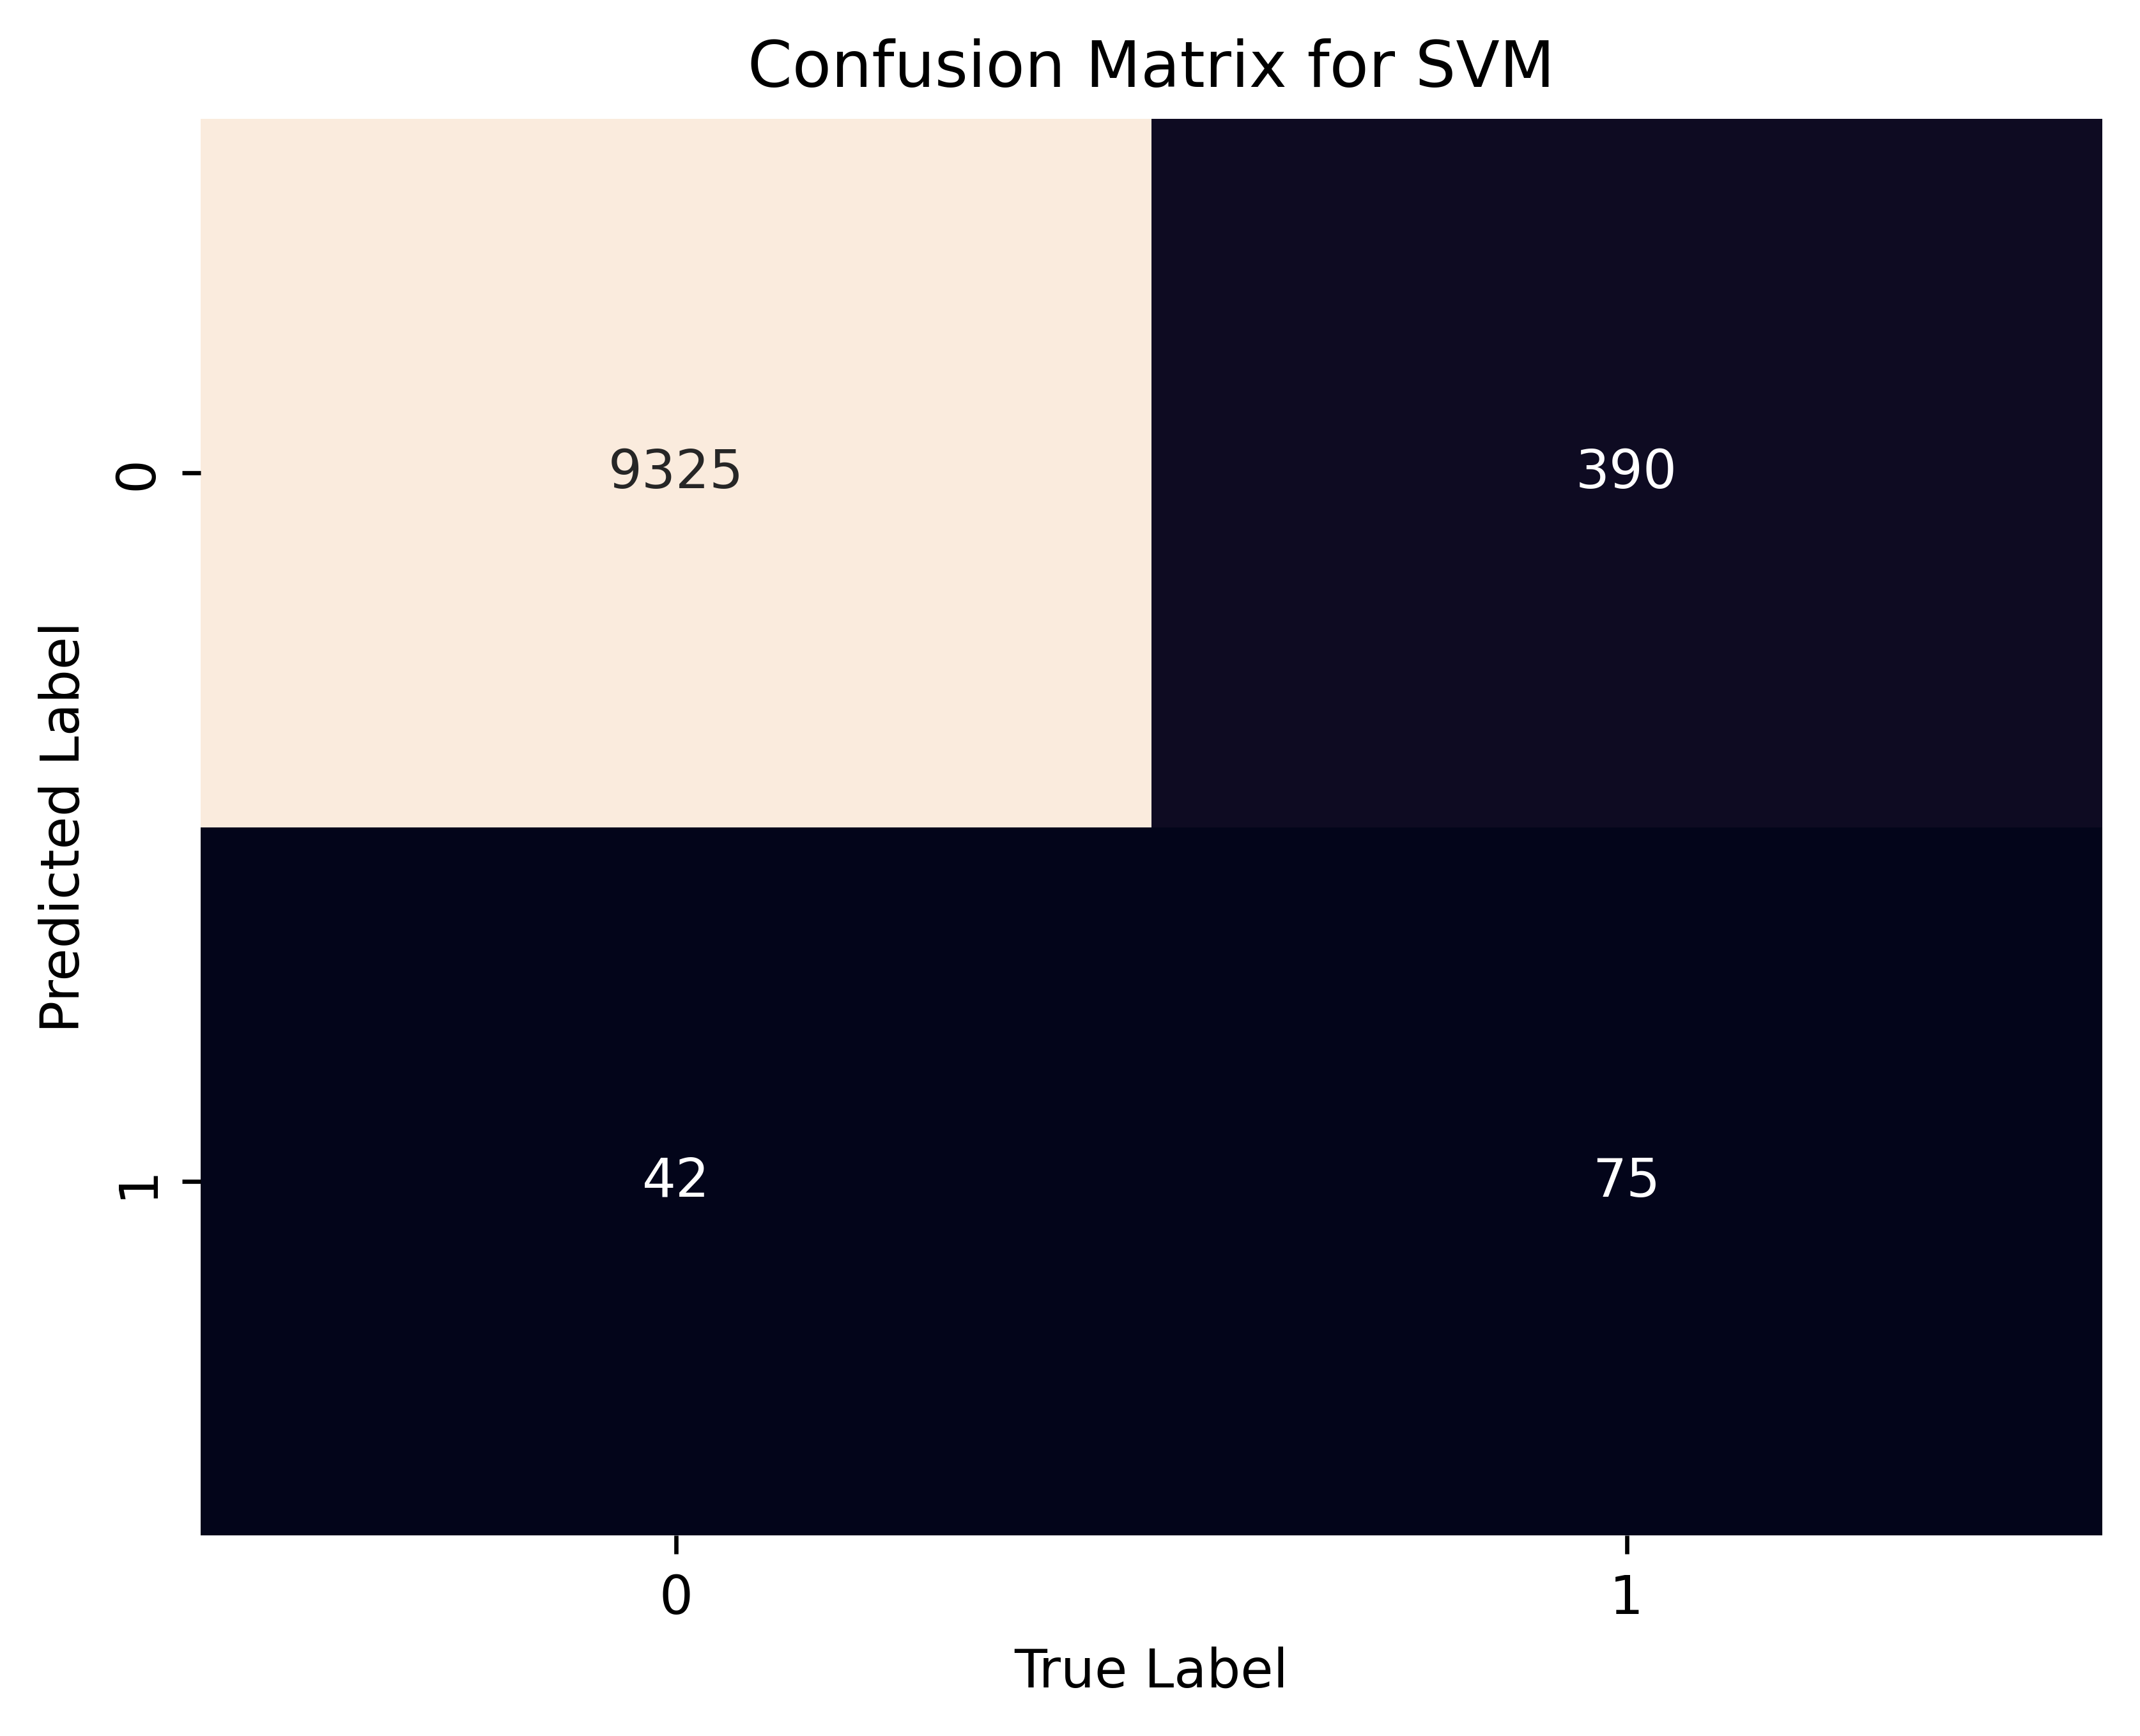

Accuracy: 0.96
Precision: 0.94
Recall: 0.96
F1 Score: 0.94
Execution Time: 108.9477 seconds


In [43]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC  # Import SVC for Support Vector Classifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score  # Import necessary metrics

# Start the timer
start_time = time.time()

# A. Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can adjust parameters as needed (e.g., kernel type)
svm_classifier.fit(X_train, y_train)  # Train with your features (X_train) and labels (y_train)

# B. Predict labels for the test set
predicted_svm = svm_classifier.predict(X_test)

# Generate the confusion matrix
mat = confusion_matrix(y_test, predicted_svm)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_svm)
precision = precision_score(y_test, predicted_svm, average='weighted')  # Change average as needed
recall = recall_score(y_test, predicted_svm, average='weighted')  # Calculate recall
f1 = f1_score(y_test, predicted_svm, average='weighted')  # Change average as needed

# Create a heatmap for the confusion matrix
plt.figure(dpi=600)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

# Add title and labels
plt.title('Confusion Matrix for SVM')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# Save and show the plot
plt.savefig("confusion_matrix_svm.png")
plt.show()

# Calculate execution time
end_time = time.time()
execution_time = end_time - start_time

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")  # Print recall
print(f"F1 Score: {f1:.2f}")
print(f"Execution Time: {execution_time:.4f} seconds")


In [44]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for SVM
score_svm = accuracy_score(predicted_svm, y_test)
print("Accuracy with SVM: ", score_svm)


Accuracy with SVM:  0.9560618388934092


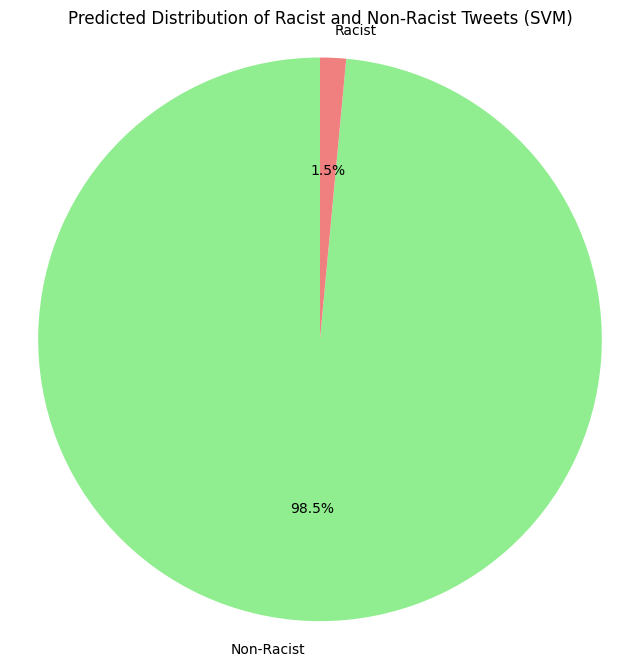

In [45]:
# A. Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC  # Import Support Vector Classifier

# B. Initialize and train the SVM classifier
svm_classifier = SVC(random_state=42)  # You can adjust parameters as needed
svm_classifier.fit(X_train, y_train)  # Train with your features and labels

# C. Predict labels for the test set
predicted_svm = svm_classifier.predict(X_test)

# D. Pie chart for predicted labels
predicted_counts = pd.Series(predicted_svm).value_counts()

# E. Define labels for the pie chart
labels = ['Non-Racist', 'Racist']  # Assuming 0 = Non-Racist, 1 = Racist

# F. Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(predicted_counts, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('Predicted Distribution of Racist and Non-Racist Tweets (SVM)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instantiate the algorithms
nb_model = MultinomialNB()
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Fit and predict with Naive Bayes
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(nb_predictions, y_test)
print("Accuracy with Naive Bayes: ", nb_accuracy)

# Fit and predict with Random Forest
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(rf_predictions, y_test)
print("Accuracy with Random Forest: ", rf_accuracy)

# Fit and predict with SVM
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(svm_predictions, y_test)
print("Accuracy with SVM: ", svm_accuracy)

# Compare all three accuracies
print("\nComparison of Accuracies:")
print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")


Accuracy with Naive Bayes:  0.9408055329536208
Accuracy with Random Forest:  0.9497558991049634
Accuracy with SVM:  0.9563669650122051

Comparison of Accuracies:
Naive Bayes Accuracy: 0.9408055329536208
Random Forest Accuracy: 0.9497558991049634
SVM Accuracy: 0.9563669650122051


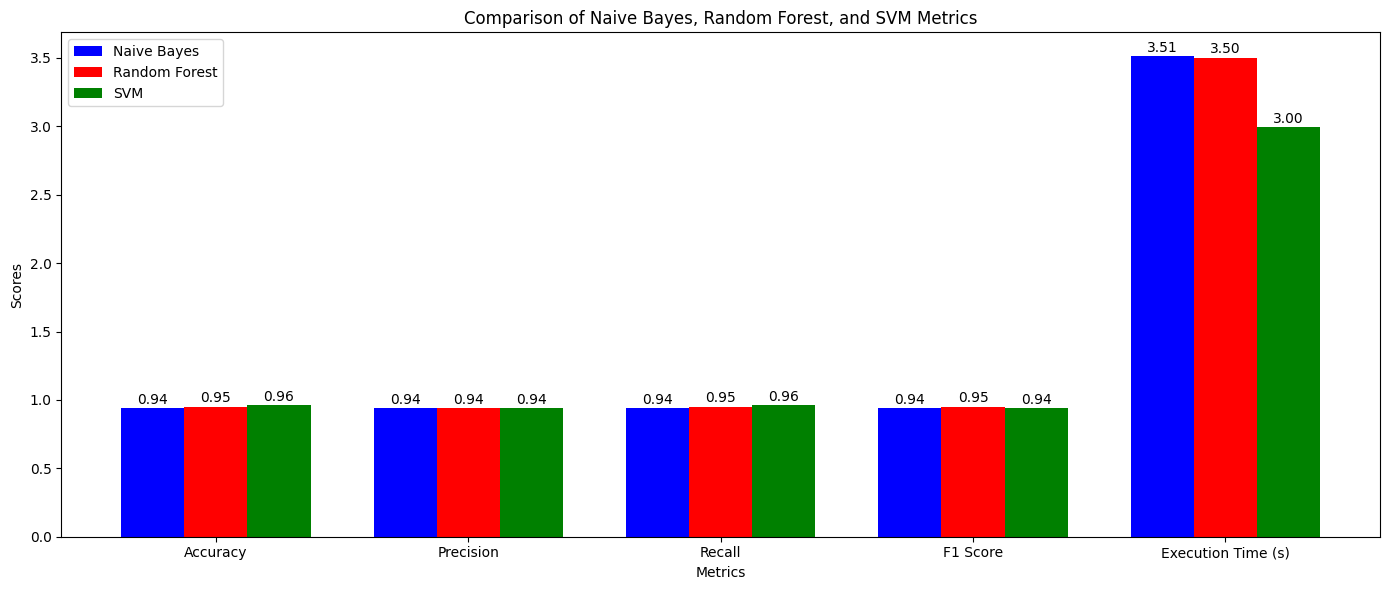

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Naive Bayes
accuracy_nb = 0.94
precision_nb = 0.94
recall_nb = 0.94 # Add recall for Naive Bayes
f1_nb = 0.94
execution_time_nb = 3.5119

# Metrics for Random Forest
accuracy_rf = 0.95
precision_rf = 0.94
recall_rf = 0.95  # Add recall for Random Forest
f1_rf = 0.95
execution_time_rf = 3.5027

# Metrics for SVM
accuracy_svm = 0.96
precision_svm = 0.94
recall_svm = 0.96  # Add recall for SVM
f1_svm = 0.94
execution_time_svm = 2.9952

# Define metric labels and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Execution Time (s)']
naive_bayes_scores = [accuracy_nb, precision_nb, recall_nb, f1_nb, execution_time_nb]
random_forest_scores = [accuracy_rf, precision_rf, recall_rf, f1_rf, execution_time_rf]
svm_scores = [accuracy_svm, precision_svm, recall_svm, f1_svm, execution_time_svm]

# Create bar width and positions
bar_width = 0.25
index = np.arange(len(metrics))

# Plotting the bar chart
plt.figure(figsize=(14, 6))
bars1 = plt.bar(index, naive_bayes_scores, bar_width, label='Naive Bayes', color='b')
bars2 = plt.bar(index + bar_width, random_forest_scores, bar_width, label='Random Forest', color='r')
bars3 = plt.bar(index + 2 * bar_width, svm_scores, bar_width, label='SVM', color='g')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Naive Bayes, Random Forest, and SVM Metrics')
plt.xticks(index + bar_width, metrics)
plt.legend()

# Display values on top of each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
